<a href="https://colab.research.google.com/github/esthy13/cil-intrusion-detection/blob/main/notebooks/0_data_cleaning_CIC_IDS_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning for CIC-IDS-2017 dataset

## 0. Setting up the notebook

In [1]:
!git clone https://github.com/esthy13/cil-intrusion-detection

Cloning into 'cil-intrusion-detection'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 157 (delta 45), reused 39 (delta 15), pack-reused 70 (from 1)
Receiving objects: 100% (157/157), 46.38 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
%cd cil-intrusion-detection
!git pull

/content/cil-intrusion-detection
Already up to date.


In [3]:
!ls src

data.py  __init__.py  train.py


In [4]:
import sys, os
sys.path.append("/content/cil-intrusion-detection/src")

from src.data import trial

In [5]:
trial()

This is a trail method


In [ ]:
# resetting the path to content to avoid issues in the future
%cd ..

## Importing libraries

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Download the dataset CIC-IDS-2017

In [7]:
!wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
!unzip MachineLearningCSV.zip

--2026-02-04 12:40:56--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  15.2MB/s    in 30s     

2026-02-04 12:41:27 (7.35 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]

Archive:  MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inf

In [8]:
csv_path = "MachineLearningCVE"
csv_files = glob.glob(f"{csv_path}/*.csv")

print(len(csv_files))
csv_files

8


['MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv',
 'MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
 'MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv']

In [9]:
dfs = []
for f in csv_files:
    print("Loading:", f)
    dfs.append(pd.read_csv(f, encoding="latin1"))

df = pd.concat(dfs, ignore_index=True)
print(df.shape)

Loading: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
Loading: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
Loading: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
(2830743, 79)


## 2. Cleaning the dataset

In [10]:
df.columns = df.columns.str.strip()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [11]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
print(df.shape)
df['Label'].unique()

(2827876, 79)


array(['BENIGN', 'DDoS', 'Web Attack ï¿½ Brute Force',
       'Web Attack ï¿½ XSS', 'Web Attack ï¿½ Sql Injection', 'PortScan',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed', 'Infiltration', 'Bot', 'FTP-Patator', 'SSH-Patator'],
      dtype=object)

In [13]:
def map_attack(label: str) -> str:
    label = label.strip()

    patterns = [
        (r"^BENIGN$", "benign"),
        (r"^PortScan$", "portscan"),
        (r"^Bot$", "bot"),
        (r"^Infiltration$", "infiltration"),
        (r"^FTP-Patator$", "ftp-patator"),
        (r"^SSH-Patator$", "ssh-patator"),
        (r"^Heartbleed$", "heartbleed"),
        (r"^DDoS$", "ddos"),
        (r"Web\s*Attack", "web-attack"),
        (r"DoS", "dos"),
    ]

    for pattern, mapped_label in patterns:
        if re.search(pattern, label, re.IGNORECASE):
            return mapped_label

    return "unknown"


In [14]:
df["Label"] = df["Label"].apply(map_attack)
print(df['Label'].unique())

['benign' 'ddos' 'web-attack' 'portscan' 'dos' 'heartbleed' 'infiltration'
 'bot' 'ftp-patator' 'ssh-patator']


In [15]:
print(df['Label'].value_counts())

Label
benign          2271320
dos              251712
portscan         158804
ddos             128025
ftp-patator        7935
ssh-patator        5897
web-attack         2180
bot                1956
infiltration         36
heartbleed           11
Name: count, dtype: int64


The column label declares whether certain values in the dataset are related to an attack or not, and to which kind of attack they are realted to. There are not enough samples for infiltration and heartbleed for Machine Learning, so we drop all rows containing these values.

In [16]:
df = df[~df["Label"].isin(["infiltration", "heartbleed"])]

In [17]:
description_2017 = df.describe()
description_2017

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,...,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06,2.827829e+06
mean,8.061660e+03,1.479947e+07,9.348508e+00,1.038619e+01,5.450167e+02,1.615093e+04,2.077774e+02,1.872954e+01,5.825345e+01,6.897514e+01,...,5.412624e+00,-2.744540e+03,8.158376e+04,4.115486e+04,1.532697e+05,5.831986e+04,8.324265e+06,5.042465e+05,8.704269e+06,7.927933e+06
std,1.827445e+04,3.366615e+07,7.500163e+02,9.978763e+02,9.552742e+03,2.264206e+06,7.174572e+02,6.035580e+01,1.861718e+02,2.813218e+02,...,6.367247e+02,1.085548e+06,6.481904e+05,3.931637e+05,1.025476e+06,5.768959e+05,2.364046e+07,4.605002e+06,2.437743e+07,2.337384e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.133800e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.237953e+06,5.000000e+00,4.000000e+00,1.880000e+02,4.840000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


Identifying columns with all values equal to zero as they will have no influence on the final result

In [18]:
zero_cols = df.columns[(df== 0).all()]
zero_cols

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [19]:
clean_2017 = df.drop(columns=zero_cols)
clean_2017.shape

(2827829, 71)

In [20]:
# Columns with object type (usually strings) or category type
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols

['Label']

There are no other non-numeric columns except for the label column

In [21]:
# Check if there are duplicates
print("Duplicates: ", clean_2017.duplicated().sum())
clean_2017 = clean_2017.drop_duplicates()
clean_2017.shape

Duplicates:  307078


(2520751, 71)

In [22]:
X, y = clean_2017.drop(columns="Label"), clean_2017["Label"]
print(X.shape, y.shape)

(2520751, 70) (2520751,)


In [23]:
# Looking for highly correlated features and candidate drops / PCA

import pandas as pd
import numpy as np

# Compute correlation matrix
corr = X.corr()

# Drop one column from each perfectly correlated pair.
to_drop = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] == 1:
            to_drop.add(corr.columns[i])
to_drop

{'Avg Fwd Segment Size',
 'CWE Flag Count',
 'Fwd Header Length.1',
 'SYN Flag Count',
 'Subflow Bwd Packets',
 'Subflow Fwd Packets'}

In [24]:
X_reduced = X.drop(columns=list(to_drop))
print(X_reduced.shape)

(2520751, 64)


In [25]:
unique_counts = X_reduced.nunique()
unique_counts.sort_values(ascending=False)

,0
Flow Bytes/s,1593862
Flow Packets/s,1240118
Fwd Packets/s,1220378
Flow IAT Mean,1166266
Bwd Packets/s,1107842
...,...
URG Flag Count,2
FIN Flag Count,2
RST Flag Count,2
ACK Flag Count,2


There are no numeric columns with a number of unique values equal to the number of rows that should be eliminated

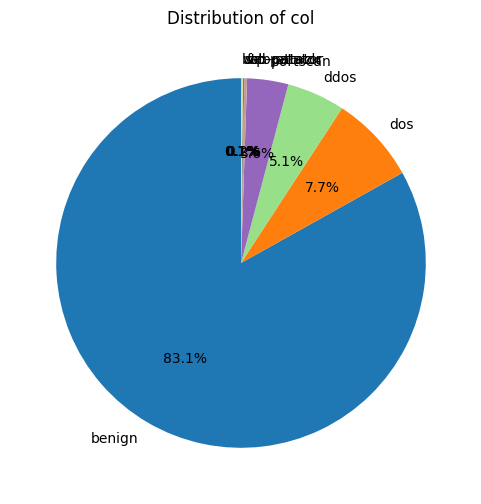

In [26]:
# Count occurrences of each category
counts = y.value_counts()

# Pie chart
plt.figure(figsize=(6,6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.ylabel('')  # remove default y-label
plt.title('Distribution of col')
plt.show()

## 3. Export the dataset

In [27]:
df_small, _ = train_test_split(
    df,
    train_size=0.10,   # 10% of the original dataset
    stratify=df["Label"],
    random_state=42
)

In [35]:
# Config
OUTPUT_DIR = "data/processed/2017"
TRAIN_DIR = os.path.join(OUTPUT_DIR, "train")
TEST_DIR = os.path.join(OUTPUT_DIR, "test")
TEST_RATIO = 0.3
SEED = 42

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

CLASSES = df_small["Label"].unique()

for cls in CLASSES:
    cls_df = df_small[df_small["Label"] == cls]

    train_df, test_df = train_test_split(
        cls_df,
        train_size=0.7,
        random_state=42
    )

    train_path = os.path.join(TRAIN_DIR, f"{cls}.csv")
    test_path = os.path.join(TEST_DIR, f"{cls}.csv")

    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(
        f"Class {cls:15s} | "
        f"Train: {train_df.shape[0]:6d} | "
        f"Test: {test_df.shape[0]:6d}"
    )

Class benign          | Train: 158991 | Test:  68140
Class dos             | Train:  17619 | Test:   7552
Class portscan        | Train:  11116 | Test:   4764
Class ddos            | Train:   8961 | Test:   3841
Class ssh-patator     | Train:    413 | Test:    177
Class ftp-patator     | Train:    555 | Test:    239
Class web-attack      | Train:    152 | Test:     66
Class bot             | Train:    137 | Test:     59


In [30]:
df_clean = X_reduced.copy()
df_clean['label'] = y
df_clean.to_csv("data/processed/cleaned_2017_esthy.csv", index=False)
df_clean.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,benign


In [46]:
!zip -r 2017.zip content/data/processed/2017

  adding: 2017/ (stored 0%)
  adding: 2017/train/ (stored 0%)
  adding: 2017/train/portscan.csv (deflated 94%)
  adding: 2017/train/ssh-patator.csv (deflated 82%)
  adding: 2017/train/ftp-patator.csv (deflated 79%)
  adding: 2017/train/bot.csv (deflated 77%)
  adding: 2017/train/benign.csv (deflated 70%)
  adding: 2017/train/web-attack.csv (deflated 77%)
  adding: 2017/train/dos.csv (deflated 73%)
  adding: 2017/train/ddos.csv (deflated 76%)
  adding: 2017/test/ (stored 0%)
  adding: 2017/test/portscan.csv (deflated 94%)
  adding: 2017/test/ssh-patator.csv (deflated 80%)
  adding: 2017/test/ftp-patator.csv (deflated 79%)
  adding: 2017/test/bot.csv (deflated 75%)
  adding: 2017/test/benign.csv (deflated 70%)
  adding: 2017/test/web-attack.csv (deflated 77%)
  adding: 2017/test/dos.csv (deflated 73%)
  adding: 2017/test/ddos.csv (deflated 76%)


In [48]:
from google.colab import files
files.download("content/data/processed/2017.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>